In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.index.min())
print(df.index.max())

0
3398


In [4]:
df.shape

(3399, 11)

In [5]:
df['Trading Time'] = df['Trading Time'].apply(lambda x : x[:-4])
df['Close Time'] = df['Close Time'].apply(lambda x : x[:-4])

In [6]:
df['Trading Time'] = pd.to_datetime(df['Trading Time'])
df['Close Time'] = pd.to_datetime(df['Close Time'])

<AxesSubplot:>

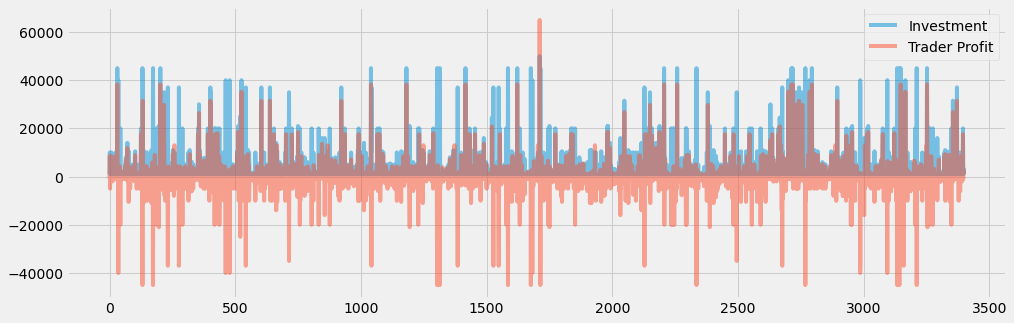

In [7]:
df[['Investment', 'Trader Profit']].plot(figsize=(15, 5), alpha= 0.5)

<AxesSubplot:>

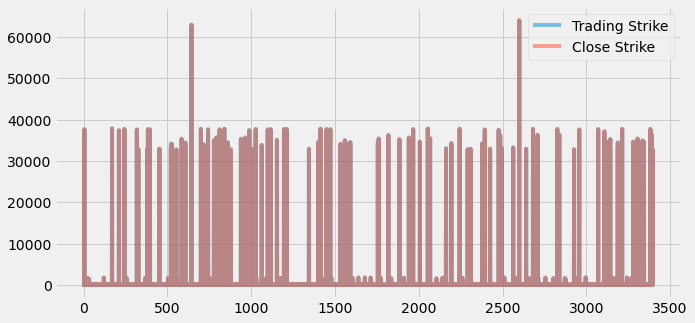

In [8]:
df[['Trading Strike', 'Close Strike']].plot(figsize=(10, 5), alpha= 0.5)

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
def decompose(df, column_name):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq')
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return result_mul, result_add

In [12]:
result_mul, result_add = decompose(df, 'Trading Strike')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None